## Fashion MNIST (CNN)

## Loading necessary libraries

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### Loading the dataset

In [2]:
(xtrain,ytrain) , (xtest,ytest) = fashion_mnist.load_data()

xtrain = xtrain.reshape(-1,28,28,1).astype('float32')/255
xtest = xtest.reshape(-1,28,28,1).astype('float32')/255


### Building model

In [3]:
def build_model():
  model = Sequential([
    #Block 1
    layers.Conv2D(32,(3,3),activation="relu",kernel_regularizer=l2(0.001),input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),


    #Block 2
    layers.Conv2D(64,(3,3),activation="relu",kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(1600,activation='relu',kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10,activation="softmax"),
   ])
  model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])
  model.summary()
  return model

In [4]:
model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1600)           │     2,561,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,596,810 (9.91 MB)

 Trainable params: 2,596,618 (9.91 MB)

 Non-trainable params: 192 (768.00 B)

### Early Stopping

In [5]:
early = EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)

### Training the model

In [6]:
hist = model.fit(
    xtrain,
    ytrain,
    epochs=16,
    callbacks = [early],
    validation_split=0.2,
)

Epoch 1/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7647 - loss: 2.1527 - val_accuracy: 0.8670 - val_loss: 0.9150
Epoch 2/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8536 - loss: 0.9163 - val_accuracy: 0.8781 - val_loss: 0.7710
Epoch 3/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8688 - loss: 0.7821 - val_accuracy: 0.8852 - val_loss: 0.6709
Epoch 4/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8719 - loss: 0.7034 - val_accuracy: 0.8760 - val_loss: 0.6548
Epoch 5/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8765 - loss: 0.6471 - val_accuracy: 0.8903 - val_loss: 0.6000
Epoch 6/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8809 - loss: 0.6139 - val_accuracy: 0.8853 - val_loss: 0.5838
Epoch 7/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8824 - loss: 0.5872 - val_accuracy: 0.8938 - val_loss: 0.5555
Epoch 8/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8858 - loss: 0.57

### Model Evalutation

In [7]:
loss,accuracy = model.evaluate(xtest,ytest)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8957 - loss: 0.5160
Loss: 0.5168309807777405
Accuracy: 0.8946999907493591


### Visualization

#### Epoch Vs Loss

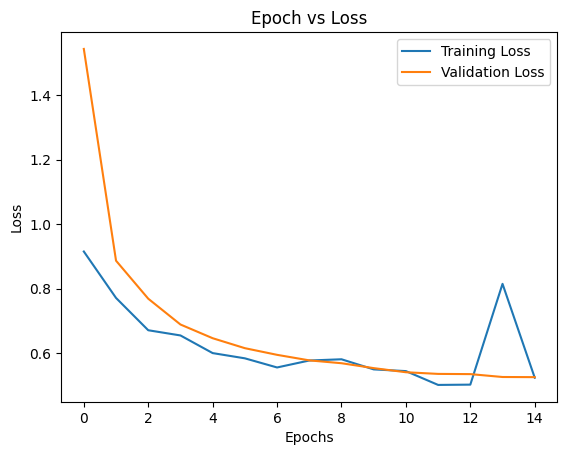

In [8]:
plt.plot(hist.history["val_loss"],label="Training Loss")
plt.plot(hist.history["loss"],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.show()

#### Epoch Vs Accuracy

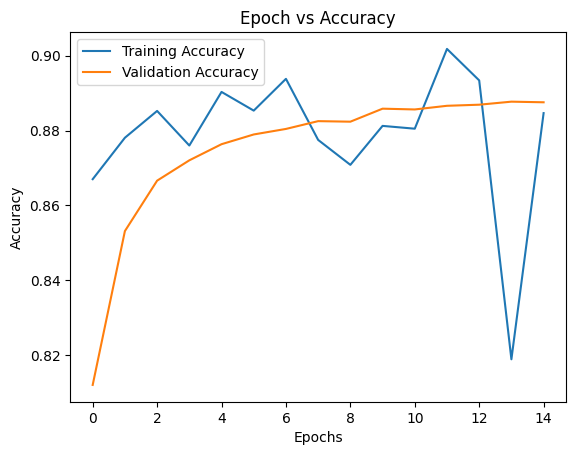

In [12]:
plt.plot(hist.history["val_accuracy"],label="Training Accuracy")
plt.plot(hist.history["accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epoch vs Accuracy")
plt.legend()
plt.show()

In [13]:
y_pred_probs = model.predict(xtest)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(ytest, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


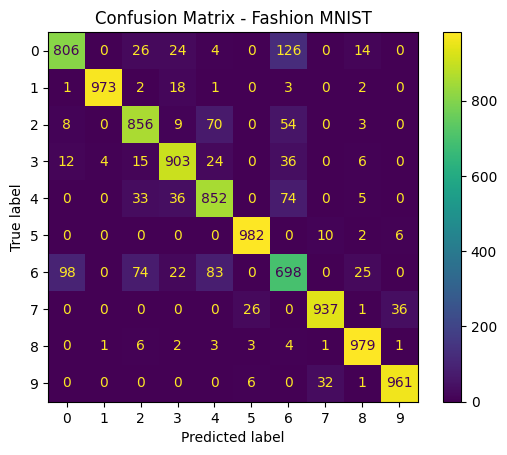

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()